# Plotting Data

## Annotations

We will plot the P/T diagram of ethane (make link towards - relevant section) and use different tools to annotate the plot, making it more explanatory. This example as been produced by Pierre and if you want to know more about the experiment itself to whome it refers to, I advise you to check it here 

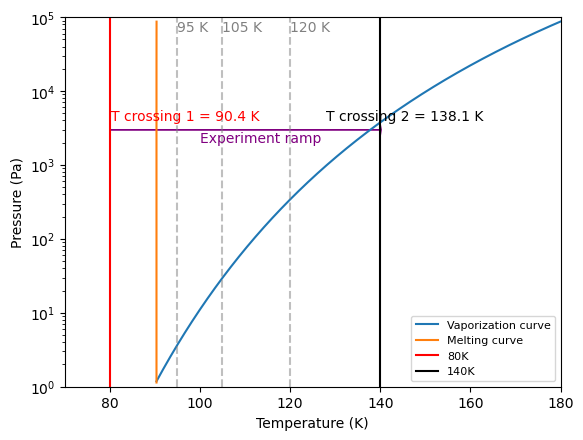

In [1]:
#!/usr/bin/python

import matplotlib.pyplot as plt
import numpy as np

T_triple = 90.368
P_triple = 1.1
npoints = 15

T_range_melt = np.zeros(npoints)

for i in range(npoints):

    T_range_melt[i] = i*0.001 + T_triple

P_melt = np.zeros(npoints)

for i in range(npoints):

    P_melt[i] = (1+(2.24*(((T_range_melt[i])/T_triple) - 1) + 1.05*(pow((T_range_melt[i])/T_triple, 2.55) - 1))*1e8)*1.14

    if 1000 < P_melt[i] < 10000:

        T_vap_1 = T_range_melt[i]

ntruc = 1000

P_vap = np.zeros(ntruc)
T_vap = np.zeros(ntruc)

for i in range(ntruc):

    T_vap[i] = T_triple + i*0.1
    P_vap[i] = 1e5*10**(4.5-(791.3/(T_vap[i]-6.422)))

    if 2900 < P_vap[i] < 3100:

        T_vap_2 = T_vap[i]

T_xp_1 = (80)
P_xp_1 = (3000)

T_xp_2 = (140)
P_xp_2 = (3000)

plt.plot(T_vap, P_vap, label = 'Vaporization curve')
plt.plot(T_range_melt, P_melt, label = 'Melting curve')
plt.axvline(x=T_xp_1, label= '80K', color='red')
plt.axvline(x=T_xp_2, label= '140K', color='black')
plt.axvline(x=95, color='grey', ls='--', alpha=0.5)
plt.annotate('95 K', xy=(95, 65000), color='grey')
plt.axvline(x=105, color='grey', ls='--', alpha=0.5)
plt.annotate('105 K', xy=(105, 65000), color='grey')
plt.axvline(x=120, color='grey', ls='--', alpha=0.5)
plt.annotate('120 K', xy=(120, 65000), color='grey')
plt.arrow(T_xp_1, P_xp_1, 60, 0, head_width=1000, head_length=0.2, color='purple')
plt.annotate('T crossing 1 = {0:.1f} K'.format(T_vap_1), xy=(T_vap_1, P_xp_2), xytext=(T_vap_1 -10 , 4000), color='red')
plt.annotate('T crossing 2 = {0:.1f} K'.format(T_vap_2), xy=(T_vap_2, P_xp_2), xytext=(T_vap_2 -10 , 4000))
plt.annotate('Experiment ramp', xy=(110, 3000), xytext=(100, 2000), color='purple')
plt.ylim([1, 1e5])
plt.yscale('log')
plt.xlim([70, 180])
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (Pa)')
plt.legend(prop={'size': 8})
plt.savefig('ethane_PT_diagram.png')
plt.show()